In [1]:
#import file dari komputer
from google.colab import files
  
  
uploaded = files.upload()

Saving data-bobot.csv to data-bobot.csv


# Natural Language Processing

## Importing the libraries

In [2]:
pip install swifter

     |████████████████████████████████| 296 kB 7.7 MB/s 
     |████████████████████████████████| 132 kB 55.2 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [1]:
pip install sastrawi

     |████████████████████████████████| 209 kB 7.8 MB/s 


In [3]:
pip install googletrans

     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 1.3 MB 21.8 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 65 kB 3.4 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15734 sha256=2d69e2fd5b0b4889b4c15b73c84da1ee6fb790653c5ebb0afdd57c8b33f67690
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


In [4]:
import pandas as pd
import numpy as np
import pytz
import re
import nltk
import ast
import string
import itertools
import matplotlib.pyplot as plt
import seaborn as sns


import io
import pickle, os
import googletrans   

from datetime import datetime,timedelta
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from nltk.probability import FreqDist
from nltk.stem.porter import PorterStemmer
from googletrans import Translator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn import naive_bayes
from sklearn.metrics import  classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from textblob import TextBlob

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Importing the dataset

In [5]:
df = pd.read_csv('data-bobot.csv')
df.shape
df.head()

,text,total,positive,negative,score,label
0,ngaruh tidak lolos kak prakerja nya,3,1,2,-1,Negatif
1,prakerja tidak lolos blt bpjs tidak gaji tidak...,8,3,5,-2,Negatif
2,nyata nyata bayar tidak kartu prakerja konon a...,4,0,4,-4,Negatif
3,hai kak kakak maksud pendafataran prakerja rek...,1,1,0,1,Positif
4,hai kak kakak ingin buka rekening bni taplus p...,2,1,1,0,Netral


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      940 non-null    object
 1   total     940 non-null    int64 
 2   positive  940 non-null    int64 
 3   negative  940 non-null    int64 
 4   score     940 non-null    int64 
 5   label     940 non-null    object
dtypes: int64(4), object(2)
memory usage: 44.2+ KB


## Cleaning the texts(Case Folding, Tokenizing, Filtering and Stemming)  

cleaning tweet


In [ ]:
def cleanTweet(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions
    text = re.sub(r'[0-9]+', '', text) # Remove number
    text = re.sub(r'#','',text) # Remove #hashtag symbol
    text = re.sub(r'[^\w]', ' ', text)# Remove symbols
    text = re.sub(r'_', ' ', text)# Remove underscore
    text = re.sub(r'[\n]+', '', text) # Remove new line
    text = re.sub(r':', '', text) # Remove : symbols
    text = re.sub(r'RT[\s]+', '', text) # Remove RT word
    re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE) # Removing https hyperlink
    re.sub(r'^http?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE) # Removing http hyperlink
    
    return text# lets apply to our data frame
dataset['clean_tweets'] = dataset['Tweet'].apply(cleanTweet)# Lets take a look
dataset['clean_tweets'].head()

0        cari roti sehat   pilihannya  PO H  untuk ...
1    Ikut aku kejar hadiah dengan total nilai puluh...
2      Panen telur tokopedia    https   t co BARRTwLkd
3    Dugem Shop Malioboro     https   t co AYXrQnen...
4    https   t co iORIfrHm Cek s adalah lambang dar...
Name: clean_tweets, dtype: object

In [ ]:
dataset.head()
print(dataset.dtypes)

Tweet           object
clean_tweets    object
dtype: object


In [ ]:
belajar = str(dataset['clean_tweets'])

In [ ]:
analysis = TextBlob(belajar)

analysis = analysis.translate(to="en")


In [ ]:
data = analysis
df = pd.DataFrame([x.split(';') for x in data.split('\n')])


                                                    0
0   0 looking for healthy bread of choice PO H for...
1   1 Come with me to chase prizes with a total va...
2    2 Harvest eggs at Tokopedia https t co BARRTwLkd
3       3 Dugem Shop Malioboro https t co AYXrQnen...
4   4 https t co iORIfrHm Check s is the symbol of...
5                                                 ...
6                          2995 YES CHAYANKKKKKKK twt
7   2996 Best Selling Product Categories on Tokope...
8           2997 Hello sis, I'm Sandy from Mendeko...
9   2998 enwoo eats indomie ckckc https t co ecUaFfeH
10  2999 Tokopedia is no longer single, looking fo...
11    Name: clean_tweets, Length: 3000, dtype: object


In [ ]:

df.head(100)

,0
0,0 looking for healthy bread of choice PO H for...
1,1 Come with me to chase prizes with a total va...
2,2 Harvest eggs at Tokopedia https t co BARRTwLkd
3,3 Dugem Shop Malioboro https t co AYXrQnen...
4,4 https t co iORIfrHm Check s is the symbol of...
5,...
6,2995 YES CHAYANKKKKKKK twt
7,2996 Best Selling Product Categories on Tokope...
8,"2997 Hello sis, I'm Sandy from Mendeko..."
9,2998 enwoo eats indomie ckckc https t co ecUaFfeH


In [ ]:
dataset.head()

,Tweet,clean_tweets
0,@infojakarta @gofoodindonesia @GrabID @tokoped...,cari roti sehat pilihannya PO H untuk ...
1,Ikut aku kejar hadiah dengan total nilai puluh...,Ikut aku kejar hadiah dengan total nilai puluh...
2,Panen telur tokopedia\r\n\r\nhttps://t.co/BARR...,Panen telur tokopedia https t co BARRTwLkd
3,Dugem Shop Malioboro 🖖🏿\r\nhttps://t.co/AYX6rQ...,Dugem Shop Malioboro https t co AYXrQnen...
4,https://t.co/6iORIfrHm5 Cek s adalah lambang d...,https t co iORIfrHm Cek s adalah lambang dar...


In [8]:
df.head(50)

,text,total,positive,negative,score,label
0,ngaruh tidak lolos kak prakerja nya,3,1,2,-1,Negatif
1,prakerja tidak lolos blt bpjs tidak gaji tidak...,8,3,5,-2,Negatif
2,nyata nyata bayar tidak kartu prakerja konon a...,4,0,4,-4,Negatif
3,hai kak kakak maksud pendafataran prakerja rek...,1,1,0,1,Positif
4,hai kak kakak ingin buka rekening bni taplus p...,2,1,1,0,Netral
5,hai kak nureni kena sila kakak hubung selengga...,1,1,0,1,Positif
6,habis pikir pikir prakerja sisi kapitalis sih ...,3,1,2,-1,Negatif
7,prakerja lebih kiri berik gratis rakyat,2,2,0,2,Positif
8,program prakerja lebih sosialisme kapitalisme,3,2,1,1,Positif
9,negara demokrasi bijak prakerja lebih sosialis...,5,4,1,3,Positif


In [ ]:
def cleanTweet(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions
    text = re.sub(r'[0-9]+', '', text) # Remove number
    text = re.sub(r'#','',text) # Remove #hashtag symbol
    text = re.sub(r'[^\w]', ' ', text)# Remove symbols
    text = re.sub(r'_', ' ', text)# Remove underscore
    text = re.sub(r'[\n]+', '', text) # Remove new line
    text = re.sub(r':', '', text) # Remove : symbols
    text = re.sub(r'RT[\s]+', '', text) # Remove RT word
    re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE) # Removing https hyperlink
    re.sub(r'^http?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE) # Removing http hyperlink
    
    return text# lets apply to our data frame
dataset['tweet_translate'] = df['0'].apply(cleanTweet)# Lets take a look
dataset['tweet_translate'].head()

KeyError: ignored

In [ ]:

belajar = dataset.clean_tweets
belajar = str(belajar)
print(type(belajar))


<class 'str'>


In [ ]:
print(type(analysis))

print(type(dataset))

print(dataset.dtypes)

df[index,str('clean_tweets')] = analysis


<class 'textblob.blob.TextBlob'>
<class 'pandas.core.frame.DataFrame'>
Tweet           object
clean_tweets    object
dtype: object


NameError: ignored

In [ ]:
belajar = df# Lets take a look
belajar.head()

AttributeError: ignored

In [ ]:
##### Because the library we have only support english text we need to translate it to englishfor index, row in df.iterrows():
for index, row in dfdataset.iterrows(): 
  id_blob = dataset.iloc[index]['clean_tweets']
  translation = TextBlob(id_blob)
  if translation.detect_language() != 'en' :
    en_blob = translation.translate(to=u'en')
  else :
    en_blob = translation
  belajar.at[index,str('Tweets_Translated')] = str(en_blob)# Lets take a look
belajar.head()

AttributeError: ignored

In [ ]:
# shell 7
# Wee need to know the subjectivity and the polarity# Create function to get the subectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity# Create new 2 columns
df['Subjectivity'] = df['Tweets_Translated'].apply(getSubjectivity)
df['Polarity'] = df['Tweets_Translated'].apply(getPolarity)# Lets take a look
df.head()

AttributeError: ignored

In [ ]:
# Create function to get the subectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
# Create new 2 columns
dataset['Subjectivity'] = df['Tweets_Translated'].apply(getSubjectivity)
dataset['Polarity'] = df['Tweets_Translated'].apply(getPolarity)
# Lets take a look
dataset.head()

NameError: ignored

In [ ]:
##### Because the library we have only support english text we need to translate it to englishfor index, row in df.iterrows():


Case Folding

In [ ]:
#Case Folding
dataset['Tweet'] = dataset['Tweet'].str.lower()
dataset['Tweet'].shape
print('Hasil Case Folding :')
print(dataset['Tweet'].head(20))

Hasil Case Folding :
0     @infojakarta @gofoodindonesia @grabid @tokoped...
1     ikut aku kejar hadiah dengan total nilai puluh...
2     panen telur tokopedia\r\n\r\nhttps://t.co/barr...
3     dugem shop malioboro 🖖🏿\r\nhttps://t.co/ayx6rq...
4     https://t.co/6iorifrhm5 cek s adalah lambang d...
5     ikut aku kejar hadiah dengan total nilai puluh...
6     ikut aku kejar hadiah dengan total nilai puluh...
7     postingiklan 10jutapengusaha  mejaevent alumun...
8     ikut aku kejar hadiah dengan total nilai puluh...
9     jual #chloskin di #tokopedia https://t.co/8m4c...
10    https://t.co/gyzek2pmuz https://t.co/b8qst5htj...
11    @racunbelanja maaf spam\r\n\r\nhttps://t.co/lv...
12    @racunbelanja maaf spam\r\n\r\nhttps://t.co/lv...
13    @racunbelanja maaf spam\r\n\r\nhttps://t.co/lv...
14    ikut aku kejar hadiah dengan total nilai puluh...
15    @racunbelanja maaf spam\r\n\r\nhttps://t.co/lv...
16    ikut aku kejar hadiah dengan total nilai puluh...
17    @annisapohan mbak ani

In [ ]:
# ------ Tokenizing ---------

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
dataset['Tweet'] = dataset['Tweet'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

dataset['Tweet'] = dataset['Tweet'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

dataset['Tweet'] = dataset['Tweet'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

dataset['Tweet'] = dataset['Tweet'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

dataset['Tweet'] = dataset['Tweet'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

dataset['Tweet_tokens'] = dataset['Tweet'].apply(remove_singl_char)

# NLTK word tokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

dataset['Tweet_tokens'] = dataset['Tweet'].apply(word_tokenize_wrapper)

dataset['Tweet_tokens'].shape
print('Hasil Tokenizing : \n') 
print(dataset['Tweet_tokens'].head(20))
print('\n')
dataset['Tweet_tokens'].to_csv('Tweet Tokenizing.csv')

Hasil Tokenizing : 

0     [cari, roti, sehat, pilihannya, po, untuk, rot...
1     [ikut, aku, kejar, hadiah, dengan, total, nila...
2                             [panen, telur, tokopedia]
3                              [dugem, shop, malioboro]
4                   [cek, adalah, lambang, dari, unsur]
5     [ikut, aku, kejar, hadiah, dengan, total, nila...
6     [ikut, aku, kejar, hadiah, dengan, total, nila...
7     [postingiklan, jutapengusaha, mejaevent, alumu...
8     [ikut, aku, kejar, hadiah, dengan, total, nila...
9                                            [jual, di]
10                          [paket, kabupaten, bandung]
11                                         [maaf, spam]
12                                         [maaf, spam]
13                                         [maaf, spam]
14    [ikut, aku, kejar, hadiah, dengan, total, nila...
15                                         [maaf, spam]
16    [ikut, aku, kejar, hadiah, dengan, total, nila...
17    [mbak, anisa, saya, j

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Stopword Filtering
# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

dataset['Tweet_token_WSW'] = dataset['Tweet_tokens'].apply(stopwords_removal) 

dataset['Tweet_token_WSW'].shape

dataset['Tweet_token_WSW'].to_csv('Tweet Stopword.csv')

print('Hasil Stopword : \n') 

dataset['Tweet_token_WSW'].head(20)



Hasil Stopword : 



0     [cari, roti, sehat, pilihannya, po, roti, sour...
1     [kejar, hadiah, total, nilai, puluhan, juta, r...
2                             [panen, telur, tokopedia]
3                              [dugem, shop, malioboro]
4                                 [cek, lambang, unsur]
5     [kejar, hadiah, total, nilai, puluhan, juta, r...
6     [kejar, hadiah, total, nilai, puluhan, juta, r...
7     [postingiklan, jutapengusaha, mejaevent, alumu...
8     [kejar, hadiah, total, nilai, puluhan, juta, r...
9                                                [jual]
10                          [paket, kabupaten, bandung]
11                                         [maaf, spam]
12                                         [maaf, spam]
13                                         [maaf, spam]
14    [kejar, hadiah, total, nilai, puluhan, juta, r...
15                                         [maaf, spam]
16    [kejar, hadiah, total, nilai, puluhan, juta, r...
17              [mbak, anisa, jualan, dimsum, pr

In [ ]:
# Merubah kata slang menjadi normal
normalizad_word = pd.read_excel("Kamus Normalisasi.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

dataset['Tweet_normalized'] = dataset['Tweet_token_WSW'].apply(normalized_term)
dataset['Tweet_normalized'].shape
print('Hasil Mengubah kata Slang: \n') 
dataset['Tweet_normalized'].head(10)

Hasil Mengubah kata Slang: 



0    [cari, roti, sehat, pilihannya, po, roti, sour...
1    [kejar, hadiah, total, nilai, puluhan, juta, r...
2                            [panen, telur, tokopedia]
3                    [dunia gemerlap, shop, malioboro]
4                                [cek, lambang, unsur]
5    [kejar, hadiah, total, nilai, puluhan, juta, r...
6    [kejar, hadiah, total, nilai, puluhan, juta, r...
7    [postingiklan, jutapengusaha, mejaevent, alumu...
8    [kejar, hadiah, total, nilai, puluhan, juta, r...
9                                               [jual]
Name: Tweet_normalized, dtype: object

Case fold, cleansing, normalisasi, stemming, tokenizing, stopword

In [ ]:
# Stemming dataset
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in dataset['Tweet_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


dataset['Tweet_tokens_stemmed'] = dataset['Tweet_normalized'].swifter.apply(get_stemmed_term)

dataset.drop(['Tweet','Tweet_token_WSW','Tweet_normalized'],axis=1,inplace=True)

print('Hasil Stemming :','\n')
print(dataset['Tweet_tokens_stemmed'])
dataset.to_csv("Tweet Stemming.csv")

Streaming output truncated to the last 5000 lines.
kudu : kudu
naek : naek
mainnya : main
alasan : alas
mengacc : mengacc
pembeli : beli
refund : refund
faktanya : fakta
acc : acc
pengajuan : aju
dihari : hari
tanggal : tanggal
mengajukan : aju
diterima : terima
mengambil : ambil
keputusan : putus
pengembalian : kembali
opini : opini
bukti : bukti
menjebak : jebak
penjual : jual
mengurimkan : mengurimkan
screenshot : screenshot
chat : chat
persetujuan : tuju
berdasarkan : dasar
penanganan : tangan
adil : adil
kuatnya : kuat
buktibukti : buktibukti
kirimkan : kirim
kalahtepatahkan : kalahtepatahkan
pembili : pembili
asik : asik
peraturannya : atur
konfirmasi : konfirmasi
pakai : pakai
limit : limit
fungsi : fungsi
fx : fx
mendekati : dekat
dirumuskan : rumus
selamat : selamat
malam : malam
pengaduan : adu
ketidak : tidak
adilan : adil
pengambilan : ambil
dirugikan : rugi
dimana : mana
kirim : kirim
kesian : kesi
buruburu : buruburu
maemnya : maemnya
air : air
minum : minum
coba : coba
m


Hasil Stemming : 

0       [cari, roti, sehat, pilih, po, roti, sourdough...
1       [kejar, hadiah, total, nilai, puluh, juta, rup...
2                               [panen, telur, tokopedia]
3                       [dunia gemerlap, shop, malioboro]
4                                   [cek, lambang, unsur]
                              ...                        
2995                            [iya, chayankkkkkkk, twt]
2996    [kategori, produk, laris, tokopedia, ppkm, dar...
2997    [halo, kak, kenal, sandy, dekor, kampanye, pro...
2998                       [enwoo, makan, indomie, ckckc]
2999               [tokopedia, udah, jomblo, cariin, hen]
Name: Tweet_tokens_stemmed, Length: 3000, dtype: object


In [ ]:
# menghilangkan Tweet yang sama
df = pd.read_csv('Tweet Stemming.csv',index_col=0)

print ("Menghilangkan Tweet yang sama :")
print ("sebelum " ,len(df))
df.drop_duplicates(subset = 'Tweet_tokens_stemmed', 
                                    keep = 'first', 
                                    inplace = True)

df.drop(['Tweet_tokens_stemmed'],axis=1,inplace=True)

print ("sesudah " ,len(df))

df.to_csv("Tweet Bersih.csv")

df.head(30)


In [ ]:
#Pembersihan data yang kosong
df = pd.read_csv('Tweet Bersih.csv')

len(df[df['Tweet_tokens'].isnull()==True])
df = df.dropna(subset=['Tweet_tokens'])
def count_words(x):
    words = word_tokenize(x)
    n=len(words)
    return n

df['word_length'] = df['Tweet_tokens'].apply(lambda x:count_words(x))
df['word_length'].value_counts().sort_index()

4       24
7       91
10     106
13     134
16      89
19     111
22      76
25      71
28      55
31      58
34      69
37      54
40      49
43      47
46      40
49      57
52      44
55      61
58      66
61      33
64      35
67      44
70      32
73      35
76      33
79      36
82      24
85      20
88      19
91      19
94      23
97      18
100     18
103     21
106     12
109     14
112     10
115     17
118      7
121      2
124      5
127      8
130      2
133      5
136      1
139      2
142      1
148      2
151      1
Name: word_length, dtype: int64

In [ ]:
df = df.drop(df[df['word_length']==0].index,axis=0)
df = df.reset_index(drop=True)

In [ ]:
#Membuat kamus data dari dataset
word_dict = {}
for i in range(0,len(df['Tweet_tokens'])):
    sentence = df['Tweet_tokens'][i]
    word_token = word_tokenize(sentence)
    for j in word_token:
        if j not in word_dict:
            word_dict[j] = 1
        else:
            word_dict[j] += 1

In [ ]:
len(word_dict)


5909

In [ ]:
len({k:v for (k,v) in word_dict.items() if v < 4})

4769

## Data Labeling

sources : <br>
https://github.com/louisowen6/NLP_bahasa_resources <br>
https://github.com/abhimantramb/elang/blob/master/word2vec/utils/swear-words.txt <br>
https://github.com/fajri91/InSet <br>
https://github.com/agusmakmun/SentiStrengthID/blob/master/id_dict/sentimentword.txt 

import kamus

In [ ]:
pos_lexicon = pd.read_csv('positive.tsv',sep='\t')
neg_lexicon = pd.read_csv('negative.tsv',sep='\t')

In [ ]:
lexicon = pos_lexicon.append(neg_lexicon,ignore_index=True)
len(lexicon)

10218

In [ ]:
addition = pd.read_csv('sentimentword.csv')
addition

,word,weight
0,abadi,2
1,absen,-2
2,abu-abu,-2
3,acuh,-1
4,adil,2
...,...,...
1568,waspadalah,-2
1569,wow,3
1570,wtf,-3
1571,yakin,1


In [ ]:
addition.isnull().sum()

NameError: ignored

In [ ]:
lexicon.isnull().sum()

word      0
weight    0
dtype: int64

In [ ]:
lexicon_word = lexicon['word'].to_list()

In [ ]:
lexicon['word'][0] in lexicon_word

True

In [ ]:
add_word = []
add_weight = []
for i in range(0,len(addition)):
    if (addition['word'][i] not in lexicon_word):
        add_word.append(addition['word'][i])
        add_weight.append(addition['weight'][i])

addition_lexicon = pd.DataFrame(list(zip(add_word,add_weight)),columns =['word','weight'])
addition_lexicon

,word,weight
0,acuh,-1
1,agresi,-3
2,ajaib,3
3,akal,2
4,alarm,-3
...,...,...
821,waktunya,-2
822,waspadalah,-2
823,wow,3
824,wtf,-3


In [ ]:
full_lexicon = lexicon.append(addition_lexicon,ignore_index = True)
full_lexicon.tail(5)

,word,weight
11039,waktunya,-2
11040,waspadalah,-2
11041,wow,3
11042,wtf,-3
11043,yatim,-2


In [ ]:
full_lexicon[full_lexicon['weight']>0].min()

word      (hujan) gerimis
weight                  1
dtype: object

In [ ]:
my_file = open("swear-words.txt", "r")
content = my_file.read()
swear_words = content.split("\n")

In [ ]:
weight_swear = [-5 for i in range(len(swear_words))]

In [ ]:
swear_lexicon = pd.DataFrame(list(zip(swear_words,weight_swear)),columns =['word','weight'])

In [ ]:
swear_lexicon

,word,weight
0,anjing,-5
1,anjiang,-5
2,anjir,-5
3,anjay,-5
4,asu,-5
...,...,...
57,sontoloyo,-5
58,tai,-5
59,telek,-5
60,tolol,-5


In [ ]:
full_lexicon = lexicon.append(swear_lexicon,ignore_index = True)

In [ ]:
len(full_lexicon)

10280

In [ ]:
full_lexicon.shape

full_lexicon


,word,weight
0,hai,3
1,merekam,2
2,ekstensif,3
3,paripurna,1
4,detail,2
...,...,...
10275,sontoloyo,-5
10276,tai,-5
10277,telek,-5
10278,tolol,-5


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def number_of_words(x):
    words = word_tokenize(x['word'])
    number = len(words)
    return number

In [ ]:
full_lexicon['number_of_words'] = full_lexicon.apply(lambda x: number_of_words(x),axis=1)

In [ ]:
full_lexicon = full_lexicon.drop(full_lexicon[full_lexicon['number_of_words'] == 1].index[0],axis=0)


In [ ]:
full_lexicon  = full_lexicon.reset_index(drop=True)


In [ ]:
full_lexicon[full_lexicon['number_of_words'] == 3]


,word,weight,number_of_words
111,jalan bebas hambatan,2,3
358,asah asih asuh,2,3
568,lunas (kapal,2,3
1100,mencium telapak kaki,1,3
1495,naik ke pelaminan,3,3
1847,naik ke pelamin,3,3
1865,cium telapak kaki,1,3
1898,minta kpd tuhan,3,3
1921,jalan bebas hambat,2,3
2067,acuh tak acuh,4,3


In [ ]:
full_lexicon.to_csv(r'full_lexicon.csv',index=False)

In [ ]:
len(full_lexicon)

10274

In [ ]:
modified_lexicon = pd.read_csv('full_lexicon.csv')

In [ ]:
modified_lexicon['number_of_words'] = modified_lexicon.apply(lambda x: number_of_words(x),axis=1)

In [ ]:
modified_lexicon.to_csv(r'modified_full_lexicon.csv',index=False)

In [ ]:
# menghapus kata negasi
negasi = ['bukan','tidak','ga','gk']
lexicon = pd.read_csv('modified_full_lexicon.csv')
lexicon = lexicon.drop(lexicon[(lexicon['word'] == 'bukan')
                              |(lexicon['word'] == 'tidak')
                              |(lexicon['word'] == 'ga')|(lexicon['word'] == 'gk') ].index,axis=0)
lexicon = lexicon.reset_index(drop=True)


In [ ]:
len(lexicon)

10272

In [ ]:
lexicon.head(10)


,word,weight,number_of_words
0,belas,2,1
1,welas,4,1
2,kabung,1,1
3,rahayu,4,1
4,maaf,2,1
5,hello,2,1
6,promo,3,1
7,terimakasih,5,1
8,cover,3,1
9,mohon,2,1


In [ ]:
lexicon_word = lexicon['word'].to_list()
lexicon_num_words = lexicon['number_of_words']

In [ ]:
len(lexicon_word)

10272

Checking if there is words in dictionary that does not included in the lexicon

In [ ]:
ns_words = []
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for word in word_dict.keys():
    if word not in lexicon_word:
        kata_dasar = stemmer.stem(word)
        if kata_dasar not in lexicon_word:
            ns_words.append(word)
len(ns_words)

4285

Let's take a look what kind of words they are, lets start with some words that have many occurences as this most likely not a type case

In [ ]:
len({k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3)) })

686

In [ ]:
ns_words_list = {k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3))}

It turns out that the words that is not included in lexicon, are the one that not have signifance sentiment

In [ ]:
#sort_orders = sorted(ns_words_list.items(), key=lambda x: x[1], reverse=True)
#sort_orders=sort_orders[0:20]
#for i in sort_orders:
#   print(i[0], i[1])

In [ ]:
#word_to_plot = df['Tweet_tokens'].copy()


creating word cloud to see what kind of words that appear often in the tweets related to the pandemic

In [ ]:
#word_to_plot_1 = word_to_plot.apply(lambda x: del_word(x,negasi))


In [ ]:
#wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', max_words = 1000
#                     , min_font_size = 20).generate(str(word_to_plot_1))
#plot the word cloud
#fig = plt.figure(figsize = (8,8), facecolor = None)
#plt.imshow(wordcloud)
#plt.axis('off')
#plt.show()

Sentiment

In [ ]:
lexicon['number_of_words'].value_counts()

1    9532
2     684
3      26
4      25
5       5
Name: number_of_words, dtype: int64

In [ ]:
'pekerti' in word_dict

False

In [ ]:
'baik' in lexicon_word

True

In [ ]:
sencol =[]
senrow =np.array([])
nsen = 0
factory = StemmerFactory()
stemmer = factory.create_stemmer()
sentiment_list = []
# function to write the word's sentiment if it is founded
def found_word(ind,words,word,sen,sencol,sentiment,add):
    # if it is already included in the bag of words matrix, then just increase the value
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
    #if not, than add new word
        sencol.append(word)
        sen.append(1)
        add += 1
    #if there is a negation word before it, the sentiment would be the negation of it's sentiment
    if (words[ind-1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]
    
    return sen,sencol,sentiment,add
            
# checking every words, if they are appear in the lexicon, and then calculate their sentiment if they do
for i in range(len(df)):
    nsen = senrow.shape[0]
    words = word_tokenize(df['Tweet_tokens'][i])
    sentiment = 0 
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol)>0:
        sen =[0 for j in range(len(sencol))]
    else:
        sen =[]
    
    for word in words:
        ind = words.index(word)
        # check whether they are included in the lexicon
        if word in lexicon_word :
            sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
        else:
        # if not, then check the root word
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
        # if still negative, try to match the combination of words with the adjacent words
            elif(n_words>1):
                if ind-1>-1:
                    back_1    = words[ind-1]+' '+word
                    if (back_1 in lexicon_word):
                        sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
                    elif(ind-2>-1):
                        back_2    = words[ind-2]+' '+back_1
                        if back_2 in lexicon_word:
                            sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)
    # if there is new word founded, then expand the matrix
    if add>0:  
        if i>0:
            if (nsen==0):
                senrow = np.zeros([i,add],dtype=int)
            elif(i!=nsen):
                padding_h = np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding_h))
                padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
                senrow = np.vstack((senrow,padding_v))
            else:
                padding =np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding))
            senrow = np.vstack((senrow,sen))
        if i==0:
            senrow = np.array(sen).reshape(1,len(sen))
    # if there isn't then just update the old matrix
    elif(nsen>0):
        senrow = np.vstack((senrow,sen))
        
    sentiment_list.append(sentiment)

In [ ]:
len(sentiment_list)

1801

In [ ]:
print(senrow.shape[0])

1801


In [ ]:
sencol.append('sentiment')
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)
sentiment_data = np.hstack((senrow,sentiment_array))
df_sen = pd.DataFrame(sentiment_data,columns = sencol)

In [ ]:
df_sen

,cari,sehat,pilih,biasa,ada,promo,sampai,ya,sila,cek,ikut,aku,kejar,hadiah,nilai,juta,lewat,yuk,lambang,dari,jual,paket,bandung,maaf,spam,saya,sendiri,dapat,kupon,purnama,coba,lupa,belanja,hangus,nyesek,tinggal,lagi,bunyi,kenceng,banget,...,tajam,begadang,rangkap,jabat,riah,reply,peka,babe,awat,nyesel,mikirin,gempa,bye,karsa,belah,curiga,dengerin,bimbang,cabe,jin,say,tanggap,nungguin,forum,congrats,pinggul,dengar,gabut,typo,cakep,salin,simpan,better,bohong,bias,pantau,pedes,jomblo,cariin,sentiment
0,1,1,1,1,2,1,1,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23
1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1797,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1798,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1799,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# melihat sentimen dari tweet original

cek_df = pd.DataFrame([])
cek_df['tweet'] = df['Tweet_tokens'].copy()
cek_df['sentiment']  = df_sen['sentiment'].copy()

In [ ]:
cek_df.head(20)

,tweet,sentiment
0,"['cari', 'roti', 'sehat', 'pilihannya', 'po', ...",23
1,"['ikut', 'aku', 'kejar', 'hadiah', 'dengan', '...",13
2,"['panen', 'telur', 'tokopedia']",0
3,"['dugem', 'shop', 'malioboro']",0
4,"['cek', 's', 'adalah', 'lambang', 'dari', 'uns...",-10
5,"['postingiklan', 'jutapengusaha', 'mejaevent',...",0
6,"['jual', 'di']",1
7,"['paket', 'c', 'kabupaten', 'bandung']",3
8,"['maaf', 'spam']",-1
9,"['mbak', 'anisa', 'saya', 'jualan', 'dimsum', ...",-5


In [ ]:
#create a list of our conditions
conditions = [
    (cek_df['sentiment'] < 0),
    (cek_df['sentiment'] >= 0)
    
    ]

# create a list of the values we want to assign for each condition
values = ['negatif', 'positif']

# create a new column and use np.select to assign values to it using our lists as arguments
cek_df['label'] = np.select(conditions, values)

In [ ]:
# display updated DataFrame
cek_df

,tweet,sentiment,label
0,"['cari', 'roti', 'sehat', 'pilihannya', 'po', ...",23,positif
1,"['ikut', 'aku', 'kejar', 'hadiah', 'dengan', '...",13,positif
2,"['panen', 'telur', 'tokopedia']",0,positif
3,"['dugem', 'shop', 'malioboro']",0,positif
4,"['cek', 's', 'adalah', 'lambang', 'dari', 'uns...",-10,negatif
...,...,...,...
1796,"['iya', 'chayankkkkkkk', 'twt']",0,positif
1797,"['kategori', 'produk', 'paling', 'laris', 'di'...",4,positif
1798,"['halo', 'kak', 'perkenalkan', 'saya', 'sandy'...",4,positif
1799,"['enwoo', 'makan', 'indomie', 'ckckc']",1,positif


In [ ]:
cek_df.to_csv("Tweet Label.csv")

In [ ]:
df = pd.read_csv('Tweet Label.csv')

# Analisis

In [ ]:
#konversi Label ke Polaritas
def convert(polarity):
  if polarity == 'positif':
    return 1
  elif polarity == 'netral':
    return 0
  else :
    return -1

In [ ]:
df['polarity'] = df['label'].apply(convert)
df['polarity']

0       1
1       1
2       1
3       1
4      -1
       ..
1796    1
1797    1
1798    1
1799    1
1800   -1
Name: polarity, Length: 1801, dtype: int64

In [12]:
df.head(5)

,text,total,positive,negative,score,label
0,ngaruh tidak lolos kak prakerja nya,3,1,2,-1,Negatif
1,prakerja tidak lolos blt bpjs tidak gaji tidak...,8,3,5,-2,Negatif
2,nyata nyata bayar tidak kartu prakerja konon a...,4,0,4,-4,Negatif
3,hai kak kakak maksud pendafataran prakerja rek...,1,1,0,1,Positif
4,hai kak kakak ingin buka rekening bni taplus p...,2,1,1,0,Netral


## Creating the Bag of Words model

In [ ]:
#vectorizer = CountVectorizer()
#X = vectorizer.fit_transform(df['isi])

bow_transformer = CountVectorizer()
print(df['tweet'].shape)
X = bow_transformer.fit_transform(df['tweet'])
print(X.toarray())
print('Shape of Spare Matrix :', X.shape)
print('Amount of Non-zero occurance :', X.nnz)

#save the Count Vectorized to disk
filename1 = 'count_vectorized1.pkl'
pickle.dump(bow_transformer, open(filename1, 'wb'))

#TFID Transform
tf_transform = TfidfTransformer(use_idf=False).fit(X)
X = tf_transform.transform(X)
print(X.shape)

#save the TFID to disk
filename1 = 'tfid_transform.pkl'
pickle.dump(tf_transform, open(filename1, 'wb'))

(1801,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Shape of Spare Matrix : (1801, 5881)
Amount of Non-zero occurance : 23596
(1801, 5881)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      940 non-null    object
 1   total     940 non-null    int64 
 2   positive  940 non-null    int64 
 3   negative  940 non-null    int64 
 4   score     940 non-null    int64 
 5   label     940 non-null    object
dtypes: int64(4), object(2)
memory usage: 44.2+ KB


In [43]:
df = df.astype({'label' : 'category'})
df = df.astype({'text' : 'string'})
df.dtypes

text          string
total          int64
positive       int64
negative       int64
score          int64
label       category
dtype: object

## Splitting the dataset into the Training set and Test set

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
import pickle
tv = CountVectorizer()
X_cVec = tv.fit_transform(df['text'])
print(X_cVec)

  (0, 1202)	1
  (0, 1788)	1
  (0, 1016)	1
  (0, 802)	1
  (0, 1389)	1
  (0, 1257)	1
  (1, 1788)	3
  (1, 1016)	1
  (1, 1389)	1
  (1, 235)	1
  (1, 259)	1
  (1, 545)	1
  (1, 1158)	1
  (1, 1498)	1
  (2, 1788)	2
  (2, 1389)	1
  (2, 545)	1
  (2, 1259)	2
  (2, 165)	1
  (2, 825)	1
  (2, 914)	1
  (2, 76)	1
  (2, 1195)	1
  (2, 390)	1
  (2, 308)	1
  :	:
  (937, 1737)	1
  (937, 649)	1
  (937, 1835)	1
  (938, 1389)	1
  (938, 1257)	1
  (938, 189)	1
  (938, 861)	1
  (938, 980)	2
  (938, 571)	1
  (938, 1633)	1
  (938, 602)	1
  (938, 708)	1
  (938, 6)	1
  (938, 1979)	1
  (938, 1014)	1
  (938, 780)	1
  (938, 195)	1
  (939, 1389)	1
  (939, 235)	1
  (939, 259)	1
  (939, 825)	1
  (939, 1893)	1
  (939, 1105)	1
  (939, 1339)	1
  (939, 1365)	1


In [58]:
from sklearn import svm

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size = 0.20, random_state = 42)

## Training the Naive Bayes model on the Training set

In [84]:
print(X_train.shape)
print(X_test.shape)

(752,)
(188,)


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus= ['yakali ga kuy',
         'waduh sakit sekali',
         'diam diam mencintaiku']

vectorizer = TfidfVectorizer()
#contoh
X = vectorizer.fit_transform(corpus)
X.toarray()

array([[0.        , 0.57735027, 0.57735027, 0.        , 0.        ,
        0.        , 0.        , 0.57735027],
       [0.        , 0.        , 0.        , 0.        , 0.57735027,
        0.57735027, 0.57735027, 0.        ],
       [0.89442719, 0.        , 0.        , 0.4472136 , 0.        ,
        0.        , 0.        , 0.        ]])

In [88]:
X_test = vectorizer.fit_transform(X_test)
X_train = vectorizer.transform(X_train)

print(X_train.shape)
print(X_test.shape)

(752, 724)
(188, 724)


In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB().fit(X_train, y_train)

In [89]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = svm.SVC(kernel='linear')

In [93]:
clf.fit(X_train, y_train)
predict = clf.predict(X_test)


In [91]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

In [101]:
cm = confusion_matrix(y_test, predict)
print(cm)
accuracy_score(y_test, predict)

[[46 15  2]
 [15 34 14]
 [ 3  5 54]]


0.7127659574468085

In [ ]:
from io import StringIO
classification = classification_report(y_test, preds)
s = StringIO(classification)
with open('classification.csv', 'w') as f:
  for line in s:
    f.write(line)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.7562326869806094


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, preds)
print(cm)
accuracy_score(y_test, preds)

[[  2  88]
 [  0 271]]


0.7562326869806094

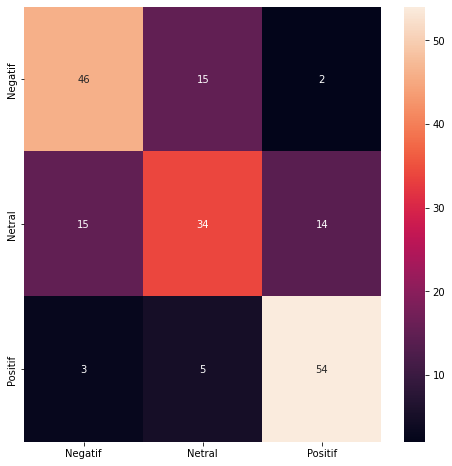

In [102]:
#grafik confusion matrix
cm = np.array(confusion_matrix(y_test, predict))

fig = plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, xticklabels=['Negatif','Netral', 'Positif'], yticklabels=['Negatif','Netral', 'Positif'])